# **Logistic Regression**

## Introduction to the topic

Logistic regression is defined as a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation. Logical regression analyzes the relationship between one or more independent variables and classifies data into discrete classes. It is extensively used in predictive modeling, where the model estimates the mathematical probability of whether an instance belongs to a specific category or not. Logistic regression is commonly used in binary classification problems where the outcome variable reveals either of the two categories (0 and 1). Usually,
* 0 represents a negative class
* 1 represents a positive class

Source: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/#lg=1&slide=0

The problem that we are trying to tackle today is the one of prediction if a person will default on their credit card payment (class 0) or not (class 1) based on some input parameters.

All images have been taken from https://github.com/MatteoM95/Default-of-Credit-Card-Clients-Dataset-Analisys?tab=readme-ov-file#feature-selection

## Describing the dataset

The dataset which I have used is has been downloaded from https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients.

It is a dataset of customers' default payments in Taiwan. There is so defined timeframe of the dataset except the information provided while elaborating on the variables below. Any and all info regarding the dataset is detailed below in the link provided below.

The variables in the dataset are as follows.
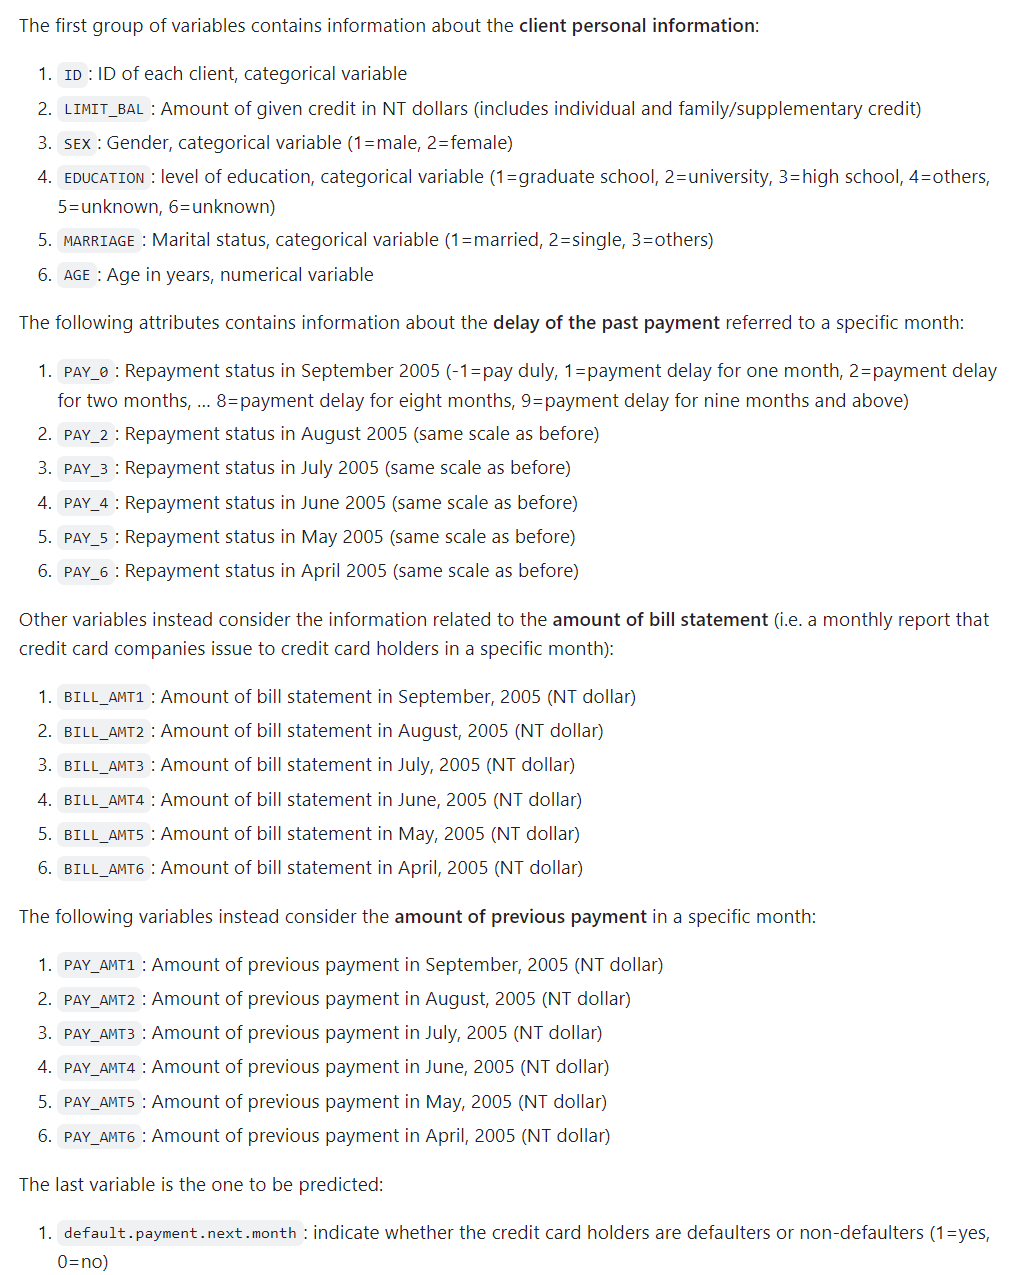![image.png]()


## Importing all necessary libraries

In [48]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

## Importing Data, Processing it and visualising it

In [49]:
df = pd.read_excel('/content/DefaultCC.xlsx')   #reading the data
df = df.drop(df[df['marriage'] == 0].index)     #cleaning the dataset
df = df.drop(df[df['education'] == 0].index)    #cleaning the dataset
df = df.drop(df[df['education'] == 5].index)    #cleaning the dataset
df = df.drop(df[df['education'] == 6].index)    #cleaning the dataset
df

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_4,bill_5,bill_6,pay_1.1,pay_2.1,pay_3.1,pay_4.1,pay_5.1,pay_6.1,dflt
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Splitting data into independent and dependent variables is a fundamental step in many types of statistical analysis and machine learning tasks, including regression analysis, classification, and forecasting. The purpose of this splitting is to prepare the data for modeling by separating the features or predictors (independent variables) from the target or response variable (dependent variable).

1. Model Building: In most statistical and machine learning models, we aim to build a relationship between the input variables (independent variables) and the output variable (dependent variable). By separating them, we can clearly define what we are trying to predict or explain.
2. Prediction: In predictive modeling tasks, the independent variables are used to make predictions about the dependent variable. Splitting the data allows us to train the model on one subset (training set) and evaluate its performance on another subset (testing set or validation set).
3. Generalization: By evaluating the model's performance on a separate dataset (testing set or validation set), we can assess its ability to generalize to new, unseen data. This is essential for determining whether the model has learned meaningful patterns or is simply memorizing the training data.
4. Feature Engineering: Splitting the data facilitates feature engineering, where we can preprocess, transform, or create new features based on the independent variables without affecting the dependent variable.

In summary, splitting data into independent and dependent variables is a crucial step in preparing data for modeling, enabling effective model building, evaluation, and generalization. It helps ensure that the model learns meaningful patterns from the data and can make accurate predictions or inferences on new, unseen data.

In our data, we have 24 independent variables(x, x1 to x24) and 1 dependent variable(y). This dependent variable is the "Dflt" column which tells us if the customer has defaulted on a loan or not. Hence, this is how we will split our dataset.:

In [50]:
# Storing the independent variable and dependent variables in separate dataframes
# Indepenedt variables will have 24 columns and dependent variable will have 1 column
df_x = df.iloc[: , :-1]
df_x = df.drop(['id'],axis=1)
df_y = df['dflt']
df_x

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_4,bill_5,bill_6,pay_1.1,pay_2.1,pay_3.1,pay_4.1,pay_5.1,pay_6.1,dflt
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


While training a Machine Learning model, we split our 'Supervised' Dataset into a Training Dataset and a Testing Dataset. We use the training dataset to 'train' our model and the testing dataset to verify how accurate our trained model is at predicting on unknown data (The training data is unknown to the model as we have not used it to train the paramaters).

  1. X_train: This will be the training set of features (size = 80% of training set).
  2. X_test: This will be the testing set of features (size = 20% of testing set).
  3. y_train: This will be the corresponding training set of target values (size = 80% of training set).
  4. y_test: This will be the corresponding testing set of target values (size = 20% of testing set).

By default, 80% of the data will be used for training (X_train and y_train), and 20% will be used for testing (X_test and y_test).. It is a standard practise to use an 80-20 split. The motivation behind this is loosely the Pareto principle.The Pareto principle is not a mathematically guaranteed property, but many observed phenomena follow the Pareto principle. As it is seen ubiquitous in nature, we try to emulate the same conjecture with our model. After all, we are trying to emulate 'intelligence'.

In [57]:
#divide both variable into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state=42)

**Scaling the Data:** Data scaling is the process of transforming the values of the features of a dataset till they are within a specific range, e.g. 0 to 1 or -1 to 1. This is to ensure that no single feature 'dominates' the distance calculations in an algorithm, and can help to improve the performance of the algorithm.

Scaling your data in machine learning is important because many algorithms use the L-2 norm between two data points in their computations, which is sensitive to the scale of the variables. If one variable is on a much larger scale than another, that variable will dominate the distance calculation, and the algorithm will be affected by that variable more than the other irrespective of the importance of that variable in being a predictor. Scaling the data can help to balance the impact of all variables on the distance calculation and can help to improve the performance of the algorithm.

Source: https://medium.com/codex/why-scaling-your-data-is-important-1aff95ca97a2

The following code uses the StandardScaler object from scikit-learn to standardize the features in both the training and testing sets. Standardization (or Z-score normalization) is a common preprocessing step in machine learning that helps to scale features to have zero mean and unit variance. As mentioned above, Standardizing features is important because it helps to ensure that all features contribute equally to the learning process, and it can improve the performance of certain machine learning algorithms. Keep in mind, we need to scale features on both - the training AND testing sets.

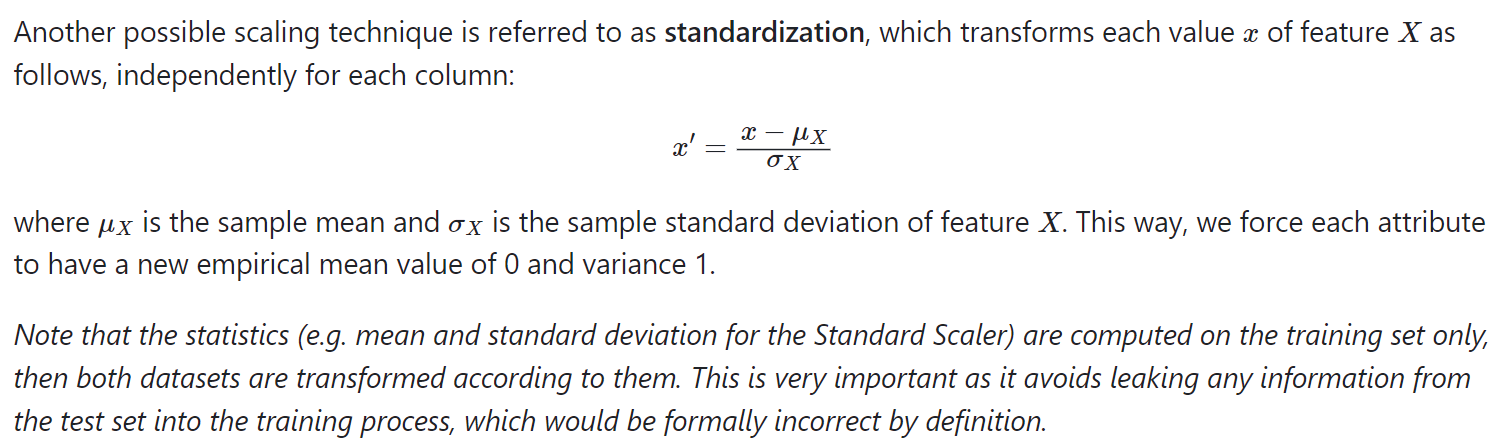### We need to scale the dataset appropriately

In [58]:
#performing standard scaling
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)   #transforming the training dataset
x_test = scaler.transform(x_test)     #transforming the testing dataset

## Performing Logistic Regression

Now that we have processed our data and scaled it, we can move ahead to create and fit the logistic regression model.

In [59]:
# We need to create an object of the LogisticRegression() class and then call it to fit our model.
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

As there are 24 independent variables, we will have 24 corresonding coefficients (The assumption is that the reader should know the formula for logistic regression. This is just the implementation) and the bias term.

We can access this using the coef_ method. It is a good practise to view the trained parameters (here, coefficients and bias terms).

In [60]:
# Viewing the trained parameters
print(log_reg.coef_)
print(log_reg.intercept_)

[[-4.54591423e-02 -1.92352381e-02 -1.34917740e-02 -4.24344015e-02
   3.19326183e-02  2.32534953e-01  5.89381609e-02  3.12183032e-02
   1.50627460e-02  1.09050698e-02  2.07316004e-02 -4.30851080e-02
  -1.97462979e-02 -9.27702674e-03 -6.58746295e-03  1.72562900e-02
   9.42606696e-03 -4.81942166e-02 -5.64559458e-02 -2.57255353e-02
  -2.88464064e-02 -2.00216946e-02 -1.07791311e-02  6.72432436e+00]]
[-5.17521512]


## Visualizing the results

Now that we have a trained model, we can go ahead and predic the value of the dependent variable on an unseen dataset --> the testing dataset. As we have already scaled our testing dataset, we can directly fit the model and predict.

In [62]:
# Let us predict the values for the dependent variable in the testing dataset
y_pred = log_reg.predict(x_test)

# Nextfew steps are to visualise the actual value vs predicted value for our testing dataset
y_test_array = np.array(y_test)
predictions = {"Actual": y_test_array , "Predicted":y_pred}
df_compared = pd.DataFrame.from_dict(predictions)
df_compared

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
5916,0,0
5917,0,0
5918,0,0
5919,0,0


Now let us calculate and visualise the Confusion Matrix.
Also, let us first understand what the confusion matrix is.

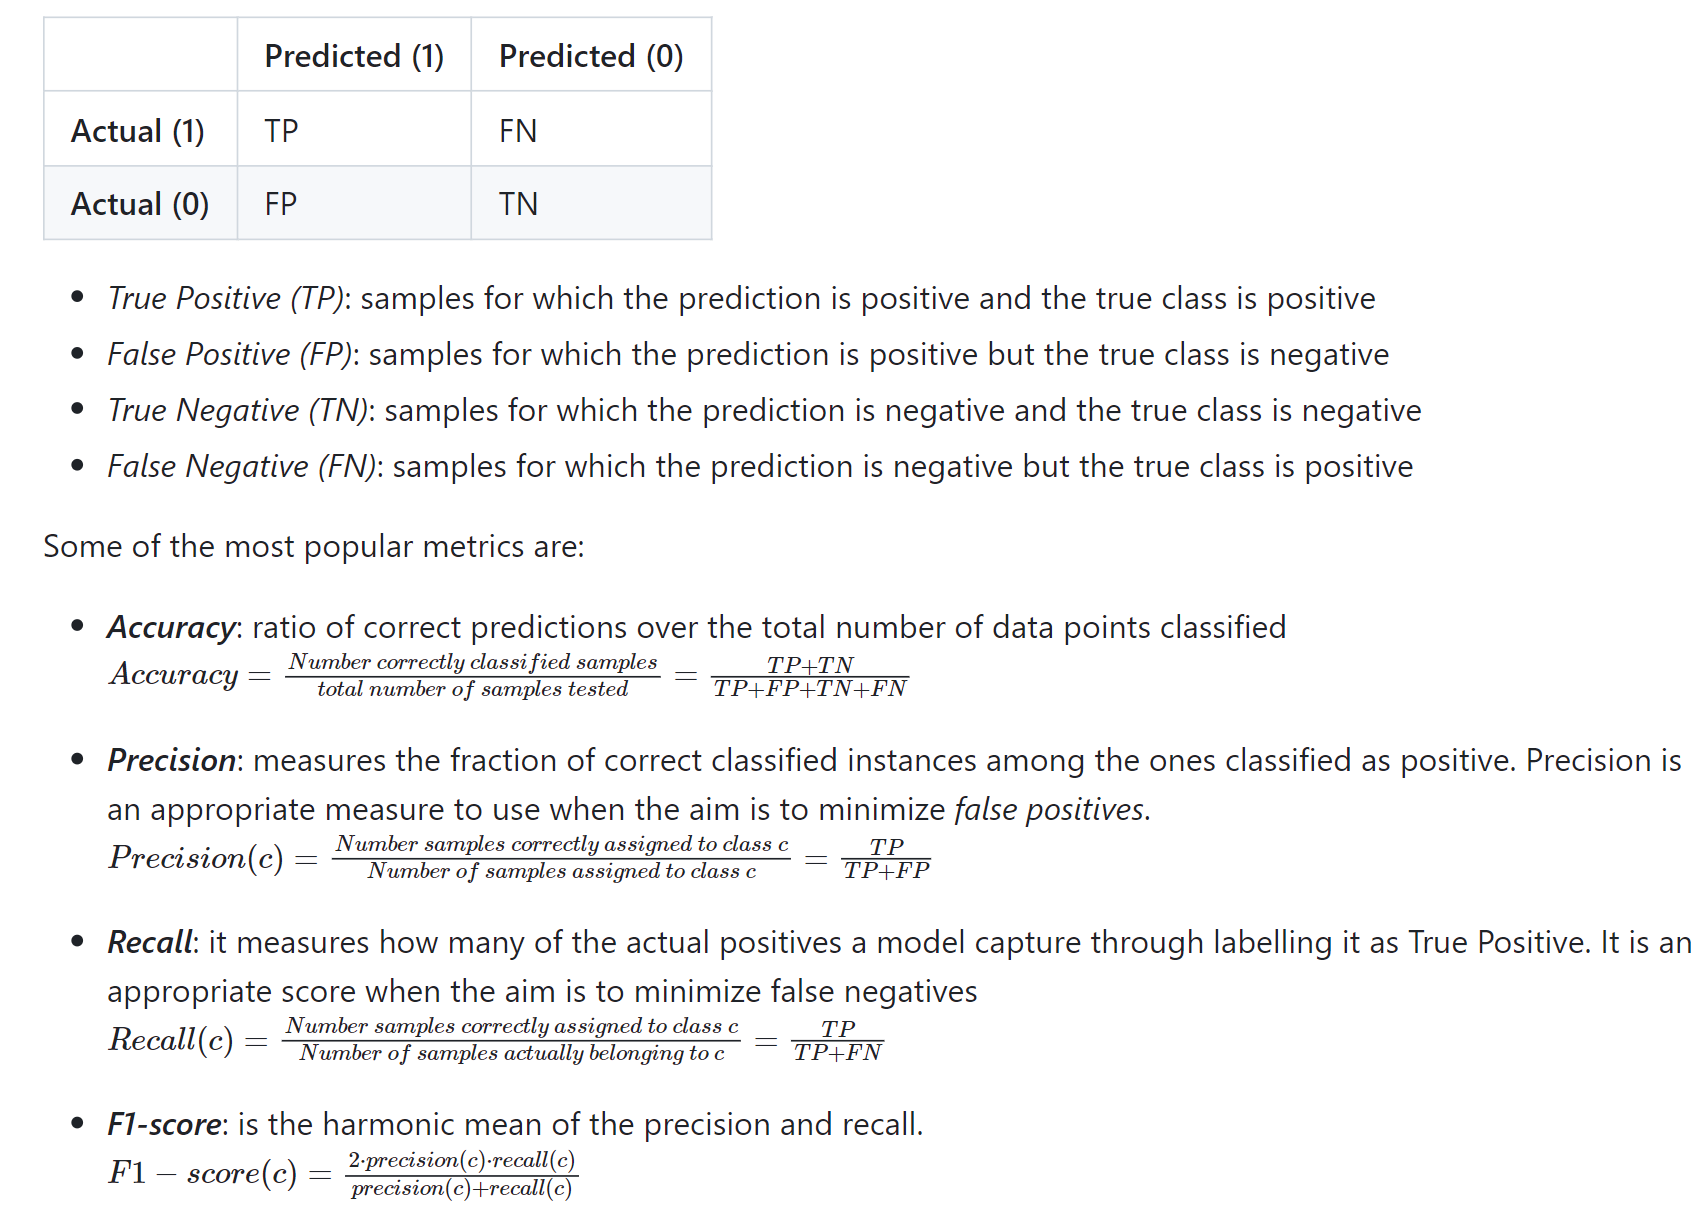Confusion matrix is as follows

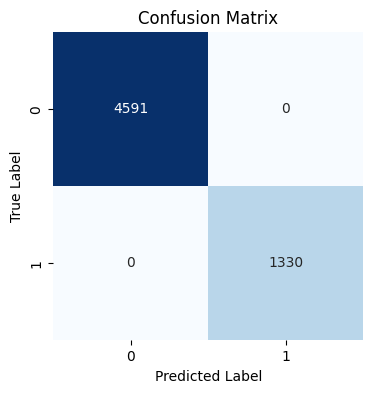

In [65]:
# Confusion Matrix is as follows
# Calculate confusion matrix
result = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(result, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Let us calculate the accuracy and precision

In [66]:
#From the formula given above,
accuracy = ( result[0,0] + result[1,1] )*100  / ( result[0,0] + result[0,1] + result[1,0] + result[1,1] )
precision = (result[0,0])*100 / ( result[0,0] + result[1,0] )
print(f"The code has accuracy of {accuracy:.2f}%.\nThe code has precision of {precision:.2f}%")

The code has accuracy of 100.00%.
The code has precision of 100.00%


## Analysing the results

We see that our logistic regression model has a 100% accuracy and a 100% precision. If your logistic regression model is reporting 100% accuracy and 100% precision, it indicates that the model is making perfect predictions on your dataset. While achieving such high performance may be possible in some scenarios, especially with well-separated classes and a high-quality dataset, it's also essential to consider potential reasons such as overfitting. Overfitting occurs when the model learns to memorize the training data instead of generalizing from it. This can happen if the model is too complex relative to the amount of training data, or if the features in the dataset contain noise or irrelevant information. Maybe becuase the data collected was very comprehensive and we took the testing data from the original dataset thus the training and testing dataset have very similar characteristics and hence the model learnt to predict very well.

In most real life applications, we never see a score this high. This is a rare case.

## Pros and Cons

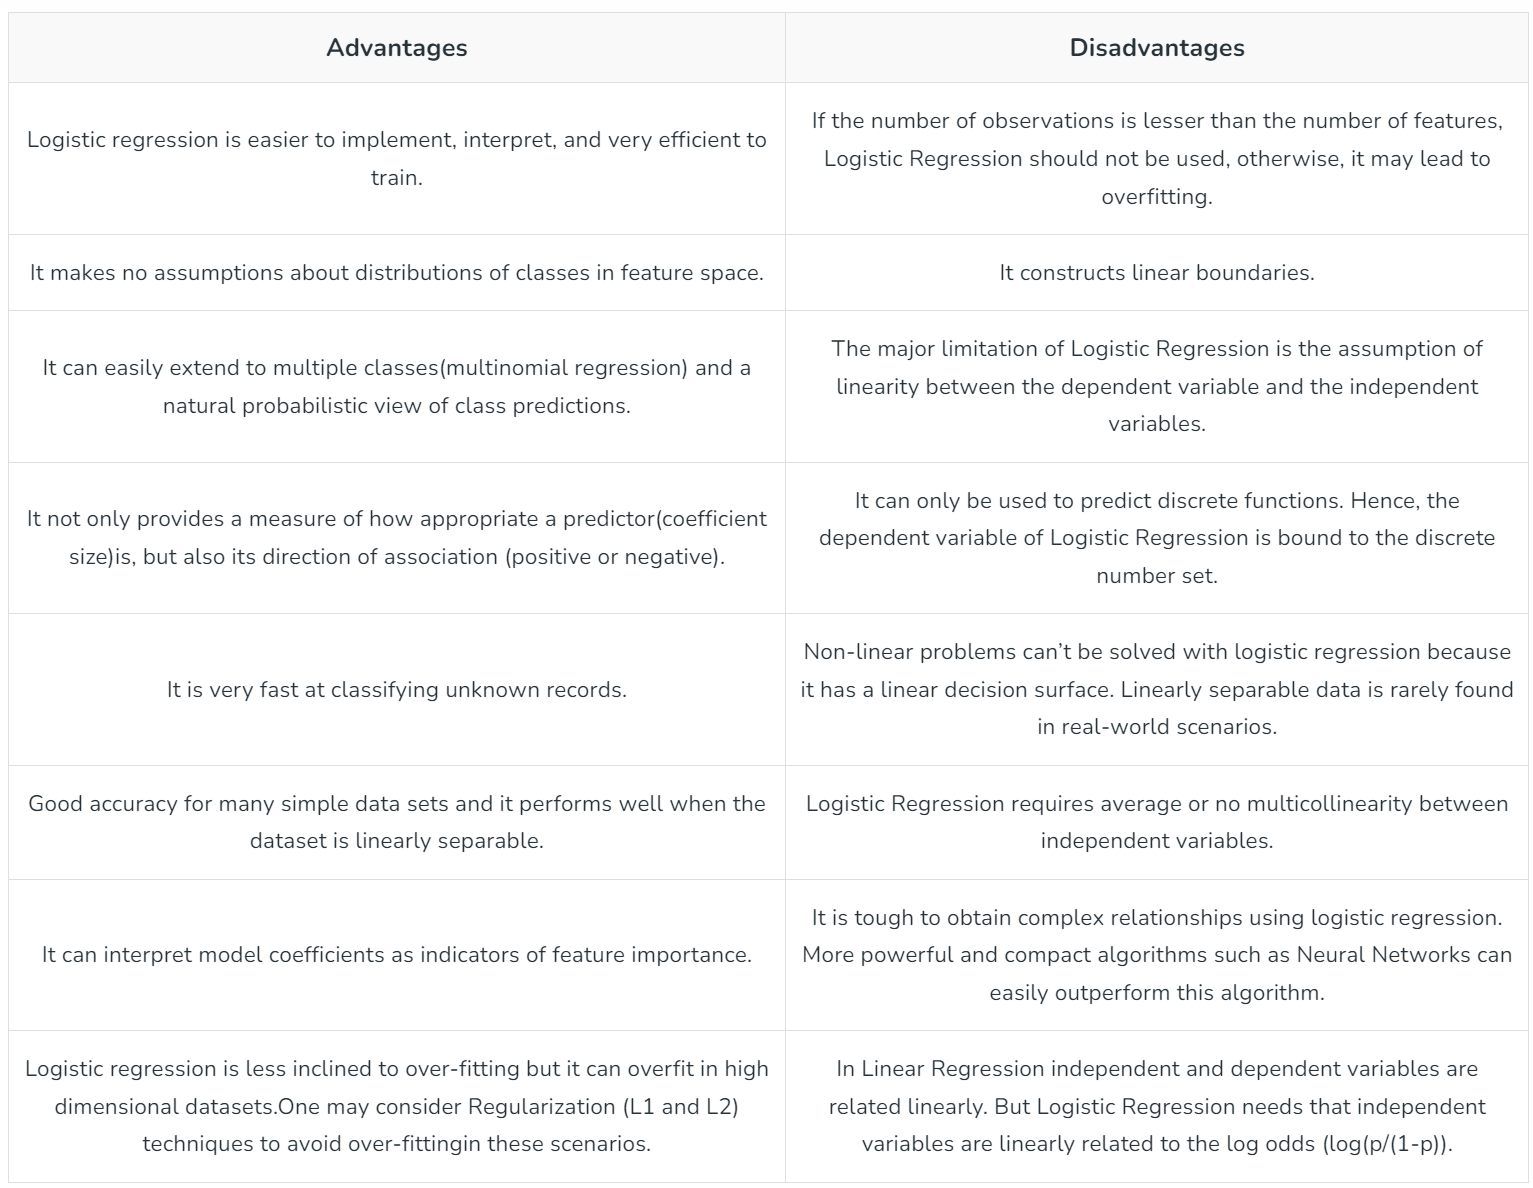

Source: https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/

# **Combining Logistic Regression and PCA**

## Introduction

Using logistic regression and PCA (Principal Component Analysis) together can offer several advantages in various machine learning and data analysis tasks. Here's an introduction to why you might use them together:

1. Dimensionality Reduction: PCA can be used to reduce the dimensionality of high-dimensional datasets by transforming the original features into a lower-dimensional space while preserving most of the variability in the data. This can be beneficial for logistic regression, especially when dealing with datasets with a large number of features, as it helps reduce the risk of overfitting and improves computational efficiency.
2. Improved Model Performance: By reducing the dimensionality of the feature space, PCA can help improve the performance of logistic regression models. It can remove redundant or irrelevant features, focus on the most informative features, and mitigate the effects of multicollinearity, leading to more stable and interpretable logistic regression models.
3. Addressing Multicollinearity: In datasets with highly correlated features (multicollinearity), logistic regression models may suffer from instability and inflated coefficient estimates. PCA can mitigate multicollinearity by transforming the original features into orthogonal (uncorrelated) principal components, which can improve the robustness of logistic regression models.
4. Visualization and Interpretability: PCA can be used for data visualization by projecting high-dimensional data onto a lower-dimensional space. This can help visualize the underlying structure of the data and identify patterns or clusters. Combining PCA with logistic regression allows for the interpretation of the transformed principal components in terms of their impact on the logistic regression outcome.
5. Feature Engineering and Selection: PCA can be viewed as a form of feature engineering that automatically generates new features (principal components) from the original data. Logistic regression models built on these principal components can provide insights into which features are most important for predicting the outcome variable, facilitating feature selection and model interpretability.

In summary, using logistic regression and PCA together offers a powerful approach for analyzing high-dimensional data, improving model performance, addressing multicollinearity, visualizing data, and interpreting model results. By leveraging the strengths of both techniques, practitioners can develop more efficient, interpretable, and robust predictive models for various machine learning and data analysis tasks.

## Describing the dataset

The dataset which I have used is has been downloaded from https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients.

It is a dataset of customers' default payments in Taiwan. There is so defined timeframe of the dataset except the information provided while elaborating on the variables below. Any and all info regarding the dataset is detailed below in the link provided below.

The variables in the dataset are as follows.
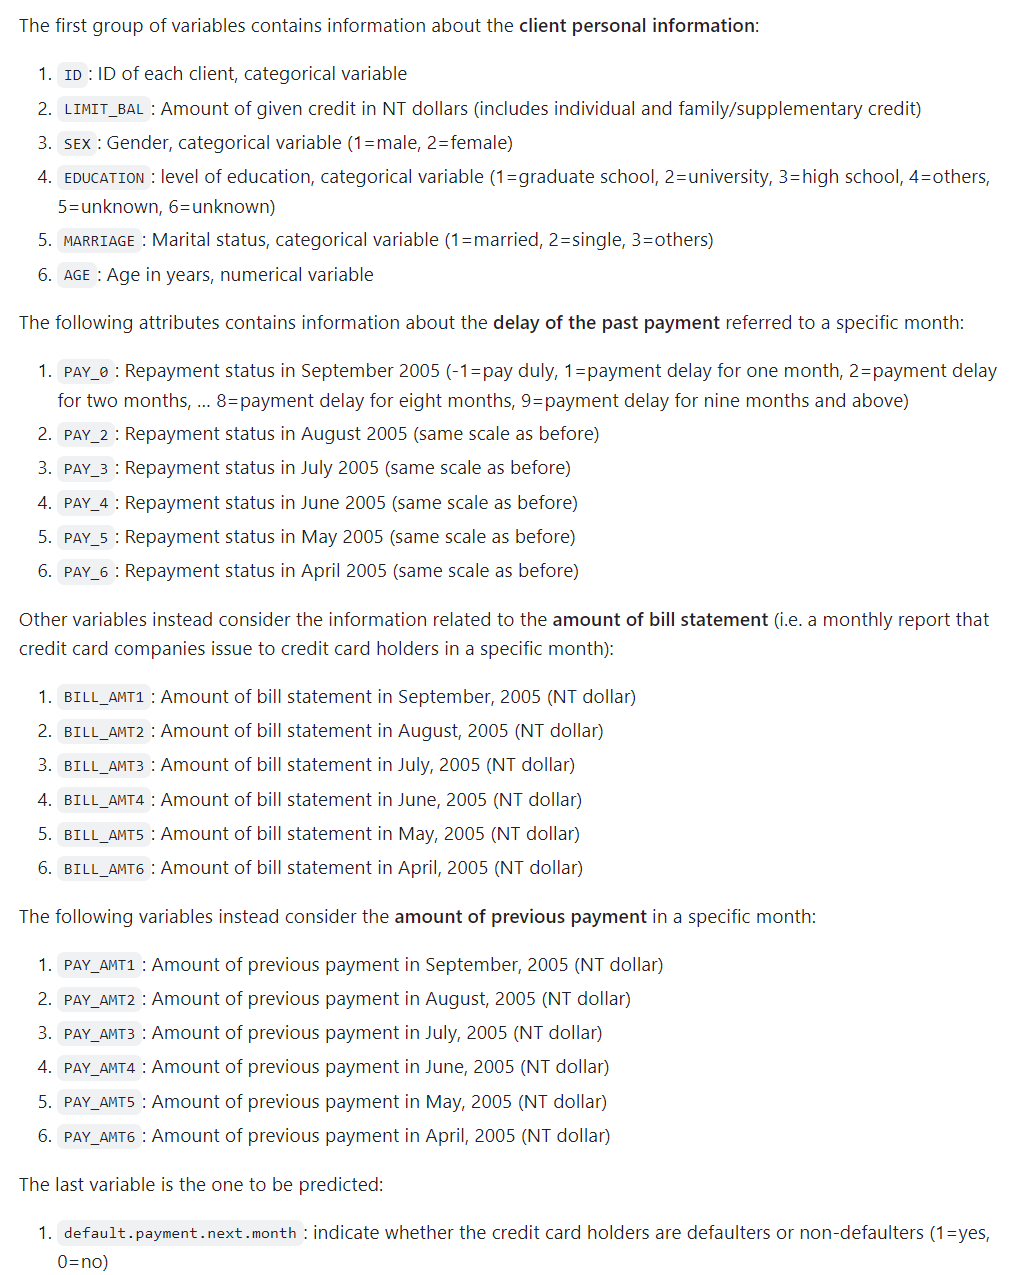![image.png]()


## Importing all the necessary libraries

In [79]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

## Importing Data, Processing it and visualising it

In [80]:
df = pd.read_excel('/content/DefaultCC.xlsx')   #reading the data
df = df.drop(df[df['marriage'] == 0].index)     #cleaning the dataset
df = df.drop(df[df['education'] == 0].index)    #cleaning the dataset
df = df.drop(df[df['education'] == 5].index)    #cleaning the dataset
df = df.drop(df[df['education'] == 6].index)    #cleaning the dataset
df

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_4,bill_5,bill_6,pay_1.1,pay_2.1,pay_3.1,pay_4.1,pay_5.1,pay_6.1,dflt
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [81]:
#let us drop the id column as it is irrelevant and after that let us plot a heatmap to view the correlation of each variable with the other
df_view = df.drop(['id'], axis=1).corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)
df_view.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_1,bill_2,bill_3,bill_4,bill_5,bill_6,pay_1.1,pay_2.1,pay_3.1,pay_4.1,pay_5.1,pay_6.1,dflt
limit_bal,1.000,0.025,-0.244,-0.110,0.144,-0.272,-0.297,-0.287,-0.268,-0.250,-0.237,0.284,0.277,0.282,0.293,0.295,0.290,0.196,0.178,0.211,0.203,0.217,0.220,-0.154
sex,0.025,1.000,0.012,-0.030,-0.091,-0.057,-0.071,-0.067,-0.061,-0.056,-0.045,-0.034,-0.032,-0.025,-0.023,-0.018,-0.018,0.000,-0.001,-0.009,-0.002,-0.002,-0.002,-0.040
education,-0.244,0.012,1.000,-0.148,0.187,0.124,0.143,0.136,0.129,0.116,0.104,0.005,0.001,-0.003,-0.014,-0.018,-0.015,-0.046,-0.039,-0.052,-0.043,-0.049,-0.054,0.049
marriage,-0.110,-0.030,-0.148,1.000,-0.418,0.018,0.023,0.032,0.032,0.035,0.035,-0.025,-0.023,-0.026,-0.024,-0.026,-0.022,-0.005,-0.008,-0.003,-0.014,-0.003,-0.006,-0.027
age,0.144,-0.091,0.187,-0.418,1.000,-0.039,-0.050,-0.053,-0.049,-0.053,-0.049,0.055,0.052,0.052,0.050,0.048,0.047,0.025,0.022,0.029,0.022,0.022,0.019,0.014
pay_1,-0.272,-0.057,0.124,0.018,-0.039,1.000,0.671,0.574,0.539,0.510,0.475,0.187,0.190,0.179,0.178,0.180,0.177,-0.080,-0.070,-0.071,-0.065,-0.060,-0.060,0.326
pay_2,-0.297,-0.071,0.143,0.023,-0.050,0.671,1.000,0.766,0.662,0.622,0.575,0.235,0.235,0.224,0.222,0.221,0.219,-0.081,-0.059,-0.056,-0.048,-0.038,-0.037,0.264
pay_3,-0.287,-0.067,0.136,0.032,-0.053,0.574,0.766,1.000,0.777,0.686,0.633,0.209,0.238,0.228,0.227,0.225,0.222,0.001,-0.067,-0.053,-0.047,-0.037,-0.037,0.235
pay_4,-0.268,-0.061,0.129,0.032,-0.049,0.539,0.662,0.777,1.000,0.820,0.717,0.203,0.226,0.245,0.246,0.243,0.239,-0.010,-0.002,-0.070,-0.044,-0.035,-0.027,0.216
pay_5,-0.250,-0.056,0.116,0.035,-0.053,0.510,0.622,0.686,0.820,1.000,0.817,0.207,0.227,0.243,0.271,0.269,0.262,-0.006,-0.003,0.008,-0.059,-0.035,-0.023,0.205


We can see alot of areas with strong correlations. Especailly between all pay_1 to pay_6 and bill_1 to bill_6. Hence we do not necessarily need all of these and can make do with some linear combination of them.

Splitting data into independent and dependent variables is a fundamental step in many types of statistical analysis and machine learning tasks, including regression analysis, classification, and forecasting. The purpose of this splitting is to prepare the data for modeling by separating the features or predictors (independent variables) from the target or response variable (dependent variable).

1. Model Building: In most statistical and machine learning models, we aim to build a relationship between the input variables (independent variables) and the output variable (dependent variable). By separating them, we can clearly define what we are trying to predict or explain.
2. Prediction: In predictive modeling tasks, the independent variables are used to make predictions about the dependent variable. Splitting the data allows us to train the model on one subset (training set) and evaluate its performance on another subset (testing set or validation set).
3. Generalization: By evaluating the model's performance on a separate dataset (testing set or validation set), we can assess its ability to generalize to new, unseen data. This is essential for determining whether the model has learned meaningful patterns or is simply memorizing the training data.
4. Feature Engineering: Splitting the data facilitates feature engineering, where we can preprocess, transform, or create new features based on the independent variables without affecting the dependent variable.

In summary, splitting data into independent and dependent variables is a crucial step in preparing data for modeling, enabling effective model building, evaluation, and generalization. It helps ensure that the model learns meaningful patterns from the data and can make accurate predictions or inferences on new, unseen data.

In our data, we have 24 independent variables(x, x1 to x24) and 1 dependent variable(y). This dependent variable is the "Dflt" column which tells us if the customer has defaulted on a loan or not. Hence, this is how we will split our dataset.

In [82]:
#storing the independent variable and dependent variables in separate dataframes
# indepenedt varies = 24 columns and dependent variable will have 1 column
df_x = df.iloc[: , :-1]
df_x = df.drop(['id'],axis=1)
df_y = df['dflt']
df_x

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_4,bill_5,bill_6,pay_1.1,pay_2.1,pay_3.1,pay_4.1,pay_5.1,pay_6.1,dflt
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


While training a Machine Learning model, we split our 'Supervised' Dataset into a Training Dataset and a Testing Dataset. We use the training dataset to 'train' our model and the testing dataset to verify how accurate our trained model is at predicting on unknown data (The training data is unknown to the model as we have not used it to train the paramaters).

  1. X_train: This will be the training set of features (size = 80% of training set).
  2. X_test: This will be the testing set of features (size = 20% of testing set).
  3. y_train: This will be the corresponding training set of target values (size = 80% of training set).
  4. y_test: This will be the corresponding testing set of target values (size = 20% of testing set).

By default, 80% of the data will be used for training (X_train and y_train), and 20% will be used for testing (X_test and y_test).. It is a standard practise to use an 80-20 split. The motivation behind this is loosely the Pareto principle.The Pareto principle is not a mathematically guaranteed property, but many observed phenomena follow the Pareto principle. As it is seen ubiquitous in nature, we try to emulate the same conjecture with our model. After all, we are trying to emulate 'intelligence'.

In [ ]:
#divide both variable into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state=42)

**Scaling the Data:** Data scaling is the process of transforming the values of the features of a dataset till they are within a specific range, e.g. 0 to 1 or -1 to 1. This is to ensure that no single feature 'dominates' the distance calculations in an algorithm, and can help to improve the performance of the algorithm.

Scaling your data in machine learning is important because many algorithms use the L-2 norm between two data points in their computations, which is sensitive to the scale of the variables. If one variable is on a much larger scale than another, that variable will dominate the distance calculation, and the algorithm will be affected by that variable more than the other irrespective of the importance of that variable in being a predictor. Scaling the data can help to balance the impact of all variables on the distance calculation and can help to improve the performance of the algorithm.

Source: https://medium.com/codex/why-scaling-your-data-is-important-1aff95ca97a2

The following code uses the StandardScaler object from scikit-learn to standardize the features in both the training and testing sets. Standardization (or Z-score normalization) is a common preprocessing step in machine learning that helps to scale features to have zero mean and unit variance. As mentioned above, Standardizing features is important because it helps to ensure that all features contribute equally to the learning process, and it can improve the performance of certain machine learning algorithms. Keep in mind, we need to scale features on both - the training AND testing sets.

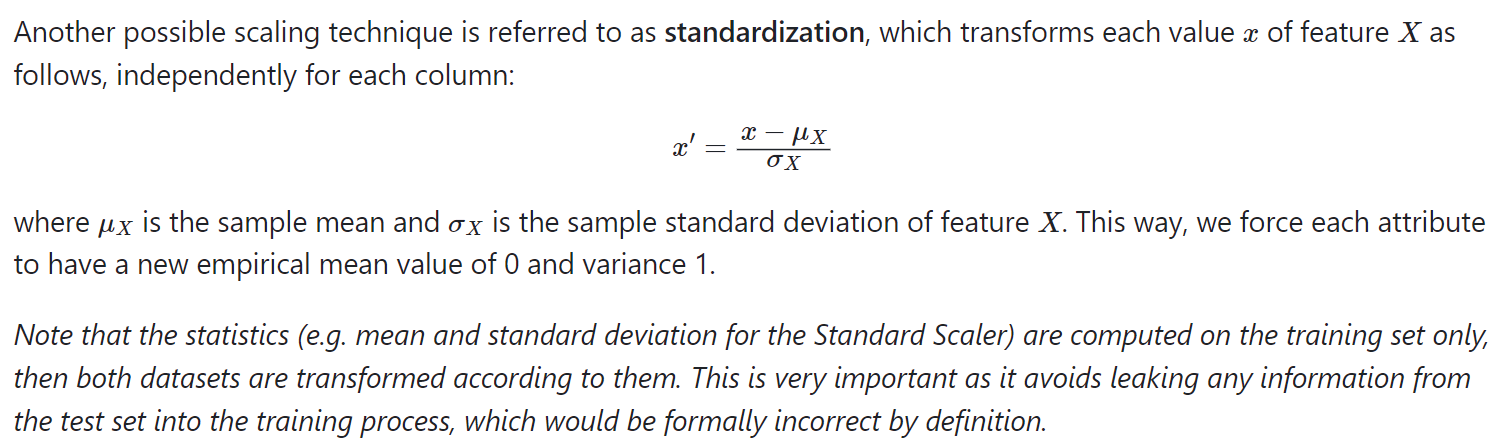### We need to scale the dataset appropriately

In [83]:
#performing standard scaling
scaler = StandardScaler()
scaler.fit(x_train)
df_train = scaler.transform(x_train)   #transforming the training dataset
df_test = scaler.transform(x_test)     #transforming the testing dataset

## Implementing PCA and Visualising the Data

Running PCA to reduce our dimension from 24 to 8. This can be done by orienting our data along the eigenvectors corresponding to the top 8 eigenvalues. As seen in the PCA section, this transformation captures 98% of information. Hence by reducing 67% of the dataset, we still only reduce 2% of the information.

In [94]:
# Setting dimension = 8
# Fitting will be done on training dataset only as we want to extrapolate testing information from this
pca = PCA(n_components=8)
pca.fit(df_train)

PCA(n_components=8)

Visualising the Dataset in terms of it's new coordinates

In [95]:
#transforming data to pca coordinates
pca_coordinates = pca.transform(df_train)
pca_coordinates.shape

(23680, 8)

In [96]:
#Visualising the training dataset in terms of the PCA coordinates
label = ['PC' + str(x) for x in range(1,len(pca_coordinates[0])+1) ]
x_train_pca = pd.DataFrame(pca_coordinates, columns=label)
x_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.732792,1.631369,-0.949883,-0.139534,1.009278,-0.332044,-0.296333,-0.040085
1,0.002927,-0.582380,-0.747017,0.240139,1.110116,-0.123558,-0.434777,0.092308
2,-3.297740,1.727568,-0.254653,-1.030464,-1.419095,0.343849,1.969944,-0.079890
3,0.713319,-0.184277,0.773918,-1.453784,-1.005103,0.920492,-0.387200,0.188683
4,-1.160294,0.121135,0.013664,0.716137,1.084264,-0.233441,-0.313948,-0.582422
...,...,...,...,...,...,...,...,...
23675,-2.948875,0.807094,-0.209542,-1.239065,-0.019722,-1.124690,2.695900,-0.145411
23676,-2.846260,3.229785,-0.937189,0.812855,0.672363,-0.382123,-0.136465,0.354174
23677,1.303639,0.236905,-1.021252,0.259691,0.993805,-0.235765,-0.456057,0.082526
23678,4.373143,-1.738188,-1.056693,0.330236,0.616763,-1.369738,1.607751,-0.903541


## Running Logistic Regression on this reduced dataset

In [97]:
# Creating an instance of the LogisticRegression() class
log_reg = LogisticRegression()
log_reg.fit(x_train_pca, y_train)

LogisticRegression()

As there are 4 independent variables (4 principal components), we will have 4 corresonding coefficients (The assumption is that the reader should know the formula for logistic regression. This is just the implementation) and the bias term.

We can access this using the coef_ method. It is a good practise to view the trained parameters (here, coefficients and bias terms).

In [98]:
#visualising the weights and biases of our regression
print(log_reg.coef_)
print(log_reg.intercept_)

[[ 0.23804797 -1.51351091 -0.59400756  0.58722687 -2.7117609  -3.90108279
   4.7082903   0.72057766]]
[-5.50855271]


We will also need to convert the testing dataset to the reduced coordinates as our logistic regression model is fit in terms of principal components and not the initial variables.

In [99]:
pca_test = pca.transform(df_test)
label = ['PC' + str(x) for x in range(1,len(pca_coordinates[0])+1) ]
x_test_pca = pd.DataFrame(pca_test, columns=label)
x_test_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.312183,-1.200552,-0.139581,0.163711,1.145971,-0.229891,-0.511440,0.098497
1,1.210322,-1.561191,0.989463,1.304880,0.081219,1.434536,-0.987211,0.433222
2,-0.517643,-0.493944,1.141999,-1.280635,0.462335,-0.412850,-1.229793,0.394164
3,-2.869809,1.433914,-0.752635,-0.417273,-1.095966,-1.902432,1.703611,0.570428
4,-0.214584,-1.060028,-0.781983,0.914712,0.241911,-1.273579,1.082754,0.080581
...,...,...,...,...,...,...,...,...
5916,-0.861366,-2.070144,0.304236,0.108740,0.241186,2.091262,-0.025431,-0.550884
5917,1.435800,0.891712,0.829712,-1.528574,0.117295,-0.930711,-0.994574,0.434689
5918,4.716660,4.018038,2.846965,0.029819,-1.245017,-3.349805,-0.930226,-12.178011
5919,-2.218105,0.565125,0.803633,-0.994882,1.157876,0.311745,0.328659,-0.390621


Predicting values of the depenedent variable (Dflt) of the testing dataset (y_test).

In [100]:
#let us predict the dependent variable
y_pred = log_reg.predict(x_test_pca)

#nextfew steps are to visualise the actual value vs predicted value for our testing dataset
y_test_array = np.array(y_test)
predictions = {"Actual": y_test_array , "Predicted":y_pred}
df_compared = pd.DataFrame.from_dict(predictions)
df_compared

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
5916,0,0
5917,0,0
5918,0,0
5919,0,0


## Visualising the result

Let us calculate the Confusion Matrix. Let us also understand what the confusion matrix is.

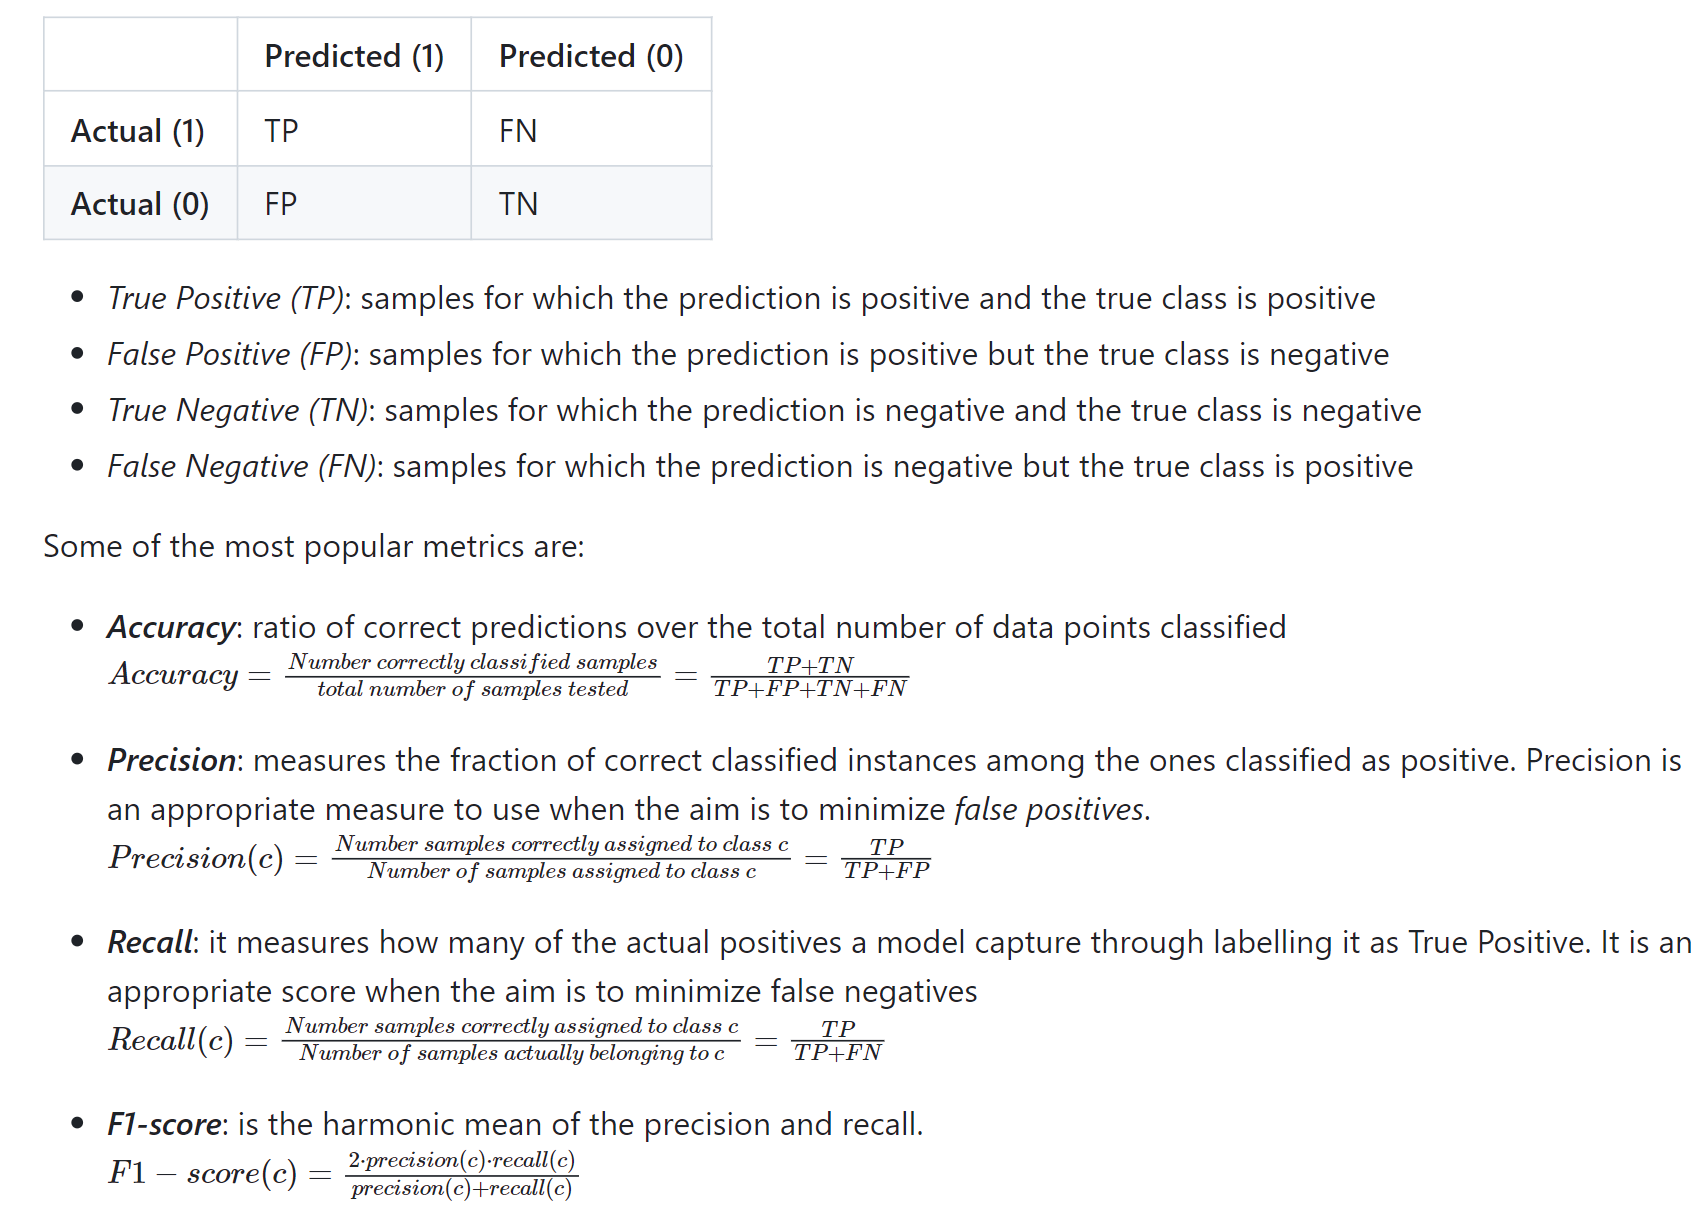Confusion matrix is as follows

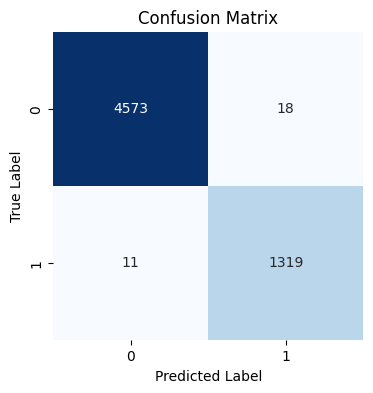

In [103]:
# Confusion Matrix is as follows
# Calculate confusion matrix
result = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(result, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Calculating Accuracy and Prediction

In [104]:
#From the formula given above,
accuracy = ( result[0,0] + result[1,1] )*100  / ( result[0,0] + result[0,1] + result[1,0] + result[1,1] )
precision = (result[0,0])*100 / ( result[0,0] + result[1,0] )
print(f"The code has accuracy of {accuracy:.2f}%.\nThe code has precision of {precision:.2f}%")

The code has accuracy of 99.51%.
The code has precision of 99.76%


## Analysing the Results

We see that our code has accuracy of 99.51% and a precision of 99.76%.
As compared to the initial 100% accuracy we got from Logistic Regression without PCA, this is hardly any difference.

Wr reduced the dimension of the dataset by two-thirds and still preserved such a high accuracy. This is the beauty of PCA. Reducing complexity and compute at the expense of a little bit of accuracy.

## Conclusion

While in our particular use case, the combination of Logistic Regression and PCA gave a slightly lesser accuracy, this is not always the case. This may be due to the nature of the dataset - it might have been a very easily learnable dataset or not too complex and hence logistic regression was able to easily fit to it hence giving a 100% accuracy.

But by doing PCA and then fitting the ML model, We compromise on a little bit of accuracy but save up a lot of computational costs in the process.